## BLUF:
The lack of information about post authors and inidivudal user activity makes it infeasible to replicate an accuracy primes experiment on Telegram.  We could search for links from untrustworthy websites across a large number of channels, but we would not be able to view who posted the links for most channels due to privacy settings. Likewise, we cannot query the API to retreive the posting history of individual accounts.  We must collect activity across numerous channels and will only be able to view the posting author on a small subset of channels.  

Creating bots is relatively easy in that we don't have to formally request authorization to create them.  However, bot accounts are limited in the actions they can perform.  Bots cannot join channels; bots must be added to channels by administrators.  Bots cannot initiate a chat conversation with other users.  

### Task list:

**1. Identify users who share article links from untrustworthy websites:** <br> API does not support free text searching across all channels.  Free text searching possible within channel posts but does not include user replies to a post.   

**2. Programmatically follow accounts to generate followers via follow-backs:** <br> API supports joining channels for non-bot accounts.  Bots must be added to a channel by the channel admins.
    
**3. Collect social network and profile information about individual users:** <br> Users can add other users to a contact list, or they can join channels and groups.  It is not possible to view a user's contacts and channels. It is possible to view the members of a public channel if the settings of the channel have an open privacy setting.

**4. Programmatically message users to rate the accuracy of a headline:** <br> Users can initiate a conversation with any user by sending an unsolicited message, but bot accounts cannot initiate conversations with other users.

**5. Measure changes to posting activity of individual users:** <br> We can measure changes to posting activity of users within a set of predefined channels.

## Connect to API

In [1]:
from telethon import TelegramClient
from telethon.tl.functions.channels import GetFullChannelRequest
import configparser
import pandas as pd

# Setting config values
config = configparser.ConfigParser()
config.read("/Users/dankoban/Documents/Dissertation/config.ini")
api_id = config['telegram']['api_id']
api_hash = config['telegram']['api_hash']
phone = config['telegram']['phone']
bot_token = config['telegram']['bot_token']

In [2]:
client = TelegramClient('user', api_id, api_hash)
await client.connect()
await client.send_code_request(f"+{phone}", force_sms=True)
code = input('enter code: ')
await client.sign_in(phone, code)

Telegram is having internal issues AuthRestartError: Restart the authorization process (caused by SendCodeRequest)


enter code: 73982


In [3]:
r = await client.get_me()
#r.to_dict()

## Get channel info

In [4]:
links = ['https://t.me/real_DonaldJTrump',
         'https://t.me/BREAKINGHEADLINES',
         'https://t.me/AmericanSpectator',
         'https://t.me/EpochTimes',
         'https://t.me/FightingTheCommies',
         'https://t.me/TrumpChannel',
         'https://t.me/WesternJournal',
         'https://t.me/MAGARevolution',
         'https://t.me/BenFerguson',
         'https://t.me/NTDNews',
         'https://t.me/BeckerNews',
         'https://t.me/TakingBackAmerica',
         'https://t.me/TrumpRepublicans',
         'https://t.me/TaxReformExpert1',
         'https://t.me/TheBabylonBee',
         'https://t.me/TaxReformExpert1',
         'https://t.me/MichaelRPompeo',
         'https://t.me/TheBlazeTV',
         'https://t.me/PearFEED',
         'https://t.me/healthcarestaff', ]

channel_info = []
for link in links:   
    r = await client(GetFullChannelRequest(channel=link))
    ch_full = pd.json_normalize(r.to_dict())    
    ch_full['title'] = pd.json_normalize(r.to_dict())['chats'][0][0]['title']
    ch_full = ch_full[['full_chat.id', 
                       'title',                       
                       'full_chat.about', 
                       'full_chat.can_view_participants', 
                       'full_chat.participants_count']]
    channel_info.append(ch_full)

channel_info = pd.concat(channel_info)
channel_info

,full_chat.id,title,full_chat.about,full_chat.can_view_participants,full_chat.participants_count
0,1462338131,Donald J. Trump,Uncensored posts from the Office of Donald J. ...,False,1096057
0,1443119244,BREAKING HEADLINES,"Committed to bringing you top, most-shared new...",False,27553
0,1353088446,The American Spectator,Providing the wittiest conservative commentary...,False,57569
0,1157742664,The Epoch Times,"An independent, award-winning voice in print &...",False,270504
0,1406147540,Fighting The Commies,Fighting the commies who hate our country with...,False,47998
0,1459890679,Trump Supporters Channel 🇺🇸,Supporters of the greatest President of our li...,False,403089
0,1462978404,The Western Journal,The Western Journal aims to equip readers with...,False,80686
0,1229595346,MAGA Revolution 🇺🇸,"Breaking News, Politics, Commentary\n\nhttps:/...",False,131460
0,1185290693,Ben Ferguson,Syndicated Talk Radio Host / TV Political Comm...,False,87241
0,1343572701,NTD,Your independent voice in television news—brin...,False,174954


## Get channel members for open channels 

In [24]:
members = await client.get_participants('https://t.me/healthcarestaff')
member_list = []
for i in range(0, len(members)):
    try:
        member_list.append(pd.DataFrame({'id': [members[i].to_dict()['id']],
                                         'username': [members[i].to_dict()['username']],
                                         'bot': [members[i].to_dict()['bot']],
                                         'first_name': [members[i].to_dict()['first_name']],
                                         'last_name': [members[i].to_dict()['last_name']],
                                         'phone': [members[i].to_dict()['phone']]}))
    except:
        pass
member_df = pd.concat(member_list)
member_df.reset_index(inplace = True, drop = True)
member_df

,id,username,bot,first_name,last_name,phone
0,1502200791,None,False,Charlotte,I,None
1,1456136269,marcin_walczak,False,Marcin,Walczak,None
2,1654767269,None,False,Justin,Murray,None
3,1586138162,AlexADcrypto,False,A,D,None
4,1228118962,FreeMe2021,False,Maxineeeeeeeee,None,None
5,1346194706,Nylahshab,False,Vear,None,None
6,1731486706,None,False,David,Smith,None
7,1410687172,None,False,Ingrida,Latif,None
8,1766197414,None,False,Karin,Massa,None
9,714283928,None,False,Buna,Bushka,None


## Get chats

In [6]:
#chats = await client.get_messages('https://t.me/healthcarestaff', None)
chats = await client.get_messages('https://t.me/TrumpChannel', None)

pd.options.display.max_colwidth = 2000
pd.options.display.max_rows = 300
chat_list = []
for i in range(0, len(chats)):
    
    try:
        channel_id = [chats[i].to_dict()['peer_id']['channel_id']]
    except:
        channel_id = [None]
    
    try:
        message_id = [chats[i].to_dict()['id']]
    except:
        message_id = [None]
        
    try:
        date = [chats[i].to_dict()['date']]
    except:
        date = [None]    
        
    try:
        message = [chats[i].to_dict()['message']]
    except:
        message = [None]                    
    
    try:
        from_user_id = [chats[i].to_dict()['from_id']['user_id']]
    except:
        from_user_id = [None]
        
    try:
        from_peer_channel = [chats[i].to_dict()['from_id']['PeerChannel']]
    except:
        from_peer_channel = [None]  
        
    try:
        replies = [chats[i].to_dict()['replies']['replies']]
    except:
        replies = [None]
    
    try: 
        forwards = [chats[i].to_dict()['forwards']]
    except:
        forwards = [None] 
    
    try: 
        fwd_from_channel_id = chats[i].to_dict()['fwd_from']['from_id']['channel_id']    
    except:
        fwd_from_channel_id = [None]     
        
    try:
        chat_list.append(pd.DataFrame({'channel_id': channel_id,
                                       'message_id': message_id,
                                       'date': date,
                                       'message': message,
                                       'from_user_id': from_user_id,
                                       'from_peer_channel': from_peer_channel,
                                       'post_author': [chats[i].to_dict()['post_author']],
                                       'views': [chats[i].to_dict()['views']],                                       
                                       'forwards': forwards,                                      
                                       'replies': replies,
                                       'fwd_from_channel_id': fwd_from_channel_id}))
    except:
        pass
        #print(i)
chat_df = pd.concat(chat_list)
chat_df.reset_index(inplace = True, drop = True)
chat_df = chat_df.sort_values('views', ascending = False)
chat_df['date'] = pd.to_datetime(chat_df['date']).dt.date
print("number of chats: " + str(len(chat_df)))
chat_df.head(10)

number of chats: 1684


,channel_id,message_id,date,message,from_user_id,from_peer_channel,post_author,views,forwards,replies,fwd_from_channel_id
559,1459890679,1307,2021-04-27,Twitter banned James O’Keefe for exposing CNN. Support him in his fight against the Big Tech oligarchs by subscribing to his VERIFIED Telegram channel.\n\nShare everywhere!\n👉 👉 @JamesOKeefeIII\nhttps://t.me/joinchat/tyyghebcPw8zYmFh,None,None,None,1338304,1730,91,None
628,1459890679,1222,2021-04-15,"🚨 URGENT: Founder of Project Veritas @JamesOKeefeIII was PERMANENTLY SUSPENDED off Twitter for exposing fake news CNN, but the good news is that James is on Telegram, and he’s verified!\n\nJOIN his channel below + SHARE this post with your friends, groups, and channels! Let’s get him to 300k subscribers!\n👇👇👇",None,None,None,788899,1971,105,None
740,1459890679,1086,2021-03-25,"“IN THE END, WE WILL WIN!”\n—President Donald J. Trump\n\nJoin 👉👉 @FightingTheCommies",None,None,None,595752,1232,1029,None
648,1459890679,1200,2021-04-12,,None,None,None,544965,2217,935,None
199,1459890679,1730,2021-07-04,🥊 Let’s fight the Democrats by following this recommended news channel: @FightingTheCommies\n\nReal. Fearless. Journalism.\nhttps://t.me/FightingTheCommies,None,None,None,515772,407,164,None
160,1459890679,1775,2021-07-14,Introducing the Freedom Phone. Launching today with its uncensorable app store & total privacy features.\n\nhttps://FreedomPhone.com,None,None,None,504669,10864,282,None
576,1459890679,1285,2021-04-25,President Trump congratulates James O’Keefe for his incredible work with Project Veritas.\n\nJoin James’ verified Telegram channel here:\n👉 https://t.me/joinchat/tyyghebcPw8zYmFh\n\nThe cancel culture mob banned him from Twitter for the sin of exposing CNN. Let’s fight back by joining him on Telegram!,None,None,None,500807,1177,168,None
278,1459890679,1638,2021-06-14,🥊 Let’s take America back by following this recommended news channel: @TakingBackAmerica\n\nReal. Fearless. Journalism.\nhttps://t.me/TakingBackAmerica,None,None,None,462382,416,208,None
629,1459890679,1221,2021-04-15,Twitter has BANNED Project Veritas’ Guerrilla Journalist @JamesOKeefeIII for exposing CNN.\n\n🥊 JOIN HIS VERIFIED TELEGRAM HERE: https://t.me/joinchat/tyyghebcPw8zYmFh,None,None,None,461022,858,579,None
747,1459890679,1077,2021-03-24,Let's Take Back America!\n\nJoin 👉👉 @MAGARevolution,None,None,None,374808,468,869,None


first post: 2019-12-30
last post: 2021-08-16


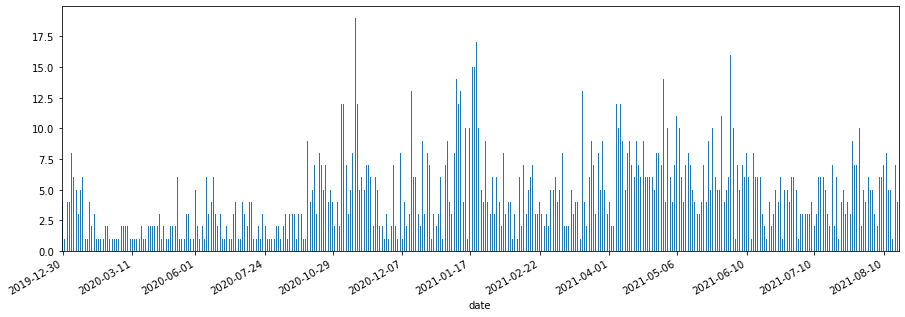

In [7]:
print("first post: " + str(min(chat_df['date'])))
print("last post: " + str(max(chat_df['date'])))

import matplotlib.dates as mdates
import matplotlib.pylab as plt
ax = chat_df[['date', 'message_id']].groupby('date').count().plot(kind='bar', figsize=(15,5),legend=None)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

In [8]:
len(chat_df[chat_df.message.str.contains('breitbart', case=False) == True])
chat_df[chat_df.message.str.contains('breitbart.com', case=False) == True]

,channel_id,message_id,date,message,from_user_id,from_peer_channel,post_author,views,forwards,replies,fwd_from_channel_id
854,1459890679,936,2021-02-25,Former Staffer Accuses Gov. Andrew Cuomo of Sexual Harassment\nhttps://www.breitbart.com/politics/2021/02/24/former-staffer-accuses-gov-andrew-cuomo-of-sexual-harassment/,None,None,None,144478,114,374,1278844630


In [9]:
chat_df[chat_df['from_user_id'].notnull()]

,channel_id,message_id,date,message,from_user_id,from_peer_channel,post_author,views,forwards,replies,fwd_from_channel_id


In [10]:
chat_df['fwd_from_channel_id'].value_counts().head()

1462338131    264
1294256027     57
1396332892     34
1295158110     30
1405021412     30
Name: fwd_from_channel_id, dtype: int64

In [11]:
chat_df.sort_values('date', ascending = False).head(1)

,channel_id,message_id,date,message,from_user_id,from_peer_channel,post_author,views,forwards,replies,fwd_from_channel_id
2,1459890679,1947,2021-08-16,,None,None,None,39169,253,502,1185290693


Cannot retrieve user replies to posts

## Bot actions

In [12]:
bot_client = TelegramClient('bot', api_id, api_hash)
await bot_client.start(bot_token = bot_token)
await bot_client.connect()

In [13]:
# Send a message with a bot
await bot_client.send_message('RandomPerson5', 'Hello World from Telethon! August 16th')

PeerIdInvalidError: An invalid Peer was used. Make sure to pass the right peer type and that the value is valid (for instance, bots cannot start conversations) (caused by SendMessageRequest)

In [52]:
# Join a channel with a bot
await bot_client(JoinChannelRequest('https://t.me/TrumpChannel'))

BotMethodInvalidError: The API access for bot users is restricted. The method you tried to invoke cannot be executed as a bot (caused by JoinChannelRequest)

In [61]:
await bot_client.send_message('https://t.me/learningtelegram2', 'I sent this from my Telegram bot')

## Automating user interactions

First we created a channel called learningtelegram2.  

In [62]:
r = await client(GetFullChannelRequest(channel='https://t.me/learningtelegram2'))
ch_full = pd.json_normalize(r.to_dict())    
ch_full['title'] = pd.json_normalize(r.to_dict())['chats'][0][0]['title']
ch_full = ch_full[['full_chat.id', 
                   'title',                       
                   'full_chat.about', 
                   'full_chat.can_view_participants', 
                   'full_chat.participants_count']]
ch_full

,full_chat.id,title,full_chat.about,full_chat.can_view_participants,full_chat.participants_count
0,1543257888,Learning Telegram,Learning how to use Telegram with Python,True,2


Next we send a message from our RandomPeron4 account.

In [63]:
await client.send_message('RandomPerson4', 'Hello from RandomPerson5')

In [65]:
await client.send_message('https://t.me/learningtelegram2', 'I sent this from Python')

In [66]:
await bot_client.send_message('https://t.me/learningtelegram2', 'Hello World sent from a bot')

In [50]:
import asyncio
from telethon import events

@client.on(events.NewMessage(pattern='(?i)hello.+'))
async def handler(event):
    # Respond whenever someone says "Hello" and something else
    await event.reply('Hey!')

@client.on(events.NewMessage(outgoing=True, pattern='!ping'))
async def handler(event):
    # Say "!pong" whenever you send "!ping", then delete both messages
    m = await event.respond('!pong')
    await asyncio.sleep(5)
    await client.delete_messages(event.chat_id, [event.id, m.id])

In [67]:
chats = await client.get_messages('https://t.me/learningtelegram2', None)

pd.options.display.max_colwidth = 2000
pd.options.display.max_rows = 300
chat_list = []
for i in range(0, len(chats)):
    
    try:
        channel_id = [chats[i].to_dict()['peer_id']['channel_id']]
    except:
        channel_id = [None]
    
    try:
        message_id = [chats[i].to_dict()['id']]
    except:
        message_id = [None]
        
    try:
        date = [chats[i].to_dict()['date']]
    except:
        date = [None]    
        
    try:
        message = [chats[i].to_dict()['message']]
    except:
        message = [None]                    
    
    try:
        from_user_id = [chats[i].to_dict()['from_id']['user_id']]
    except:
        from_user_id = [None]
        
    try:
        from_peer_channel = [chats[i].to_dict()['from_id']['PeerChannel']]
    except:
        from_peer_channel = [None]  
        
    try:
        replies = [chats[i].to_dict()['replies']['replies']]
    except:
        replies = [None]
    
    try: 
        forwards = [chats[i].to_dict()['forwards']]
    except:
        forwards = [None] 
    
    try: 
        fwd_from_channel_id = chats[i].to_dict()['fwd_from']['from_id']['channel_id']    
    except:
        fwd_from_channel_id = [None]     
        
    try:
        chat_list.append(pd.DataFrame({'channel_id': channel_id,
                                       'message_id': message_id,
                                       'date': date,
                                       'message': message,
                                       'from_user_id': from_user_id,
                                       'from_peer_channel': from_peer_channel,
                                       'post_author': [chats[i].to_dict()['post_author']],
                                       'views': [chats[i].to_dict()['views']],                                       
                                       'forwards': forwards,                                      
                                       'replies': replies,
                                       'fwd_from_channel_id': fwd_from_channel_id}))
    except:
        pass
        #print(i)
chat_df = pd.concat(chat_list)
chat_df.reset_index(inplace = True, drop = True)
chat_df = chat_df.sort_values('views', ascending = False)
chat_df['date'] = pd.to_datetime(chat_df['date']).dt.date
print("number of chats: " + str(len(chat_df)))
chat_df.head(10)

number of chats: 4


,channel_id,message_id,date,message,from_user_id,from_peer_channel,post_author,views,forwards,replies,fwd_from_channel_id
1,1543257888,24,2021-08-16,Hello World sent from a bot,None,None,survey_bot_14,2,0,None,None
3,1543257888,19,2021-08-16,I sent this from my Telegram bot,None,None,survey_bot_14,2,0,None,None
0,1543257888,25,2021-08-16,Hey!,None,None,Random Person5,1,0,None,None
2,1543257888,21,2021-08-16,I sent this from Python,None,None,Random Person5,1,0,None,None


In [57]:
chats[0].to_dict()

{'_': 'Message',
 'id': 13,
 'peer_id': {'_': 'PeerChannel', 'channel_id': 1543257888},
 'date': datetime.datetime(2021, 8, 16, 19, 29, 34, tzinfo=datetime.timezone.utc),
 'message': 'I sent this from my Telegram bot',
 'out': True,
 'mentioned': False,
 'media_unread': False,
 'silent': False,
 'post': True,
 'from_scheduled': False,
 'legacy': False,
 'edit_hide': False,
 'pinned': False,
 'from_id': None,
 'fwd_from': None,
 'via_bot_id': None,
 'reply_to': None,
 'media': None,
 'reply_markup': None,
 'entities': [],
 'views': 1,
 'forwards': 0,
 'replies': None,
 'edit_date': None,
 'post_author': None,
 'grouped_id': None,
 'restriction_reason': [],
 'ttl_period': None}

We can also join other public channel via the API interface

In [29]:
from telethon.tl.functions.channels import JoinChannelRequest, LeaveChannelRequest
await client(JoinChannelRequest('https://t.me/TrumpChannel'))

In [30]:
await client(LeaveChannelRequest('https://t.me/TrumpChannel'))